In [1]:
# ruff: noqa
import sys, os
sys.path.append(os.path.abspath("./../feedback-grape"))
sys.path.append(os.path.abspath("./../"))

# ruff: noqa
from helpers import (
    test_implementations,
    generate_random_discrete_state,
    generate_random_bloch_state,
    generate_excited_state,
    generate_ground_state,
    calculate_baseline,
    calculate_baseline_single_qubit,
)
from tqdm import tqdm
import jax, re
import numpy as np
from matplotlib import pyplot as plt
from feedback_grape.utils.states import basis
from feedback_grape.utils.fidelity import ket2dm

test_implementations()

jax.config.update("jax_enable_x64", True)

In [2]:
psi = basis(2, 0) + basis(2, 1)
rho = ket2dm(psi)
rho = rho / jax.numpy.trace(rho)
fidelities_each, states_each = calculate_baseline(
    N_qubits=1,
    gamma_p=0.1,
    gamma_m=0.5,
    evaluation_time_steps=200,
    batch_size=16,
    generate_state=generate_random_bloch_state,
    key=jax.random.PRNGKey(0),
)

fidelities_each_1, states_each_1 = calculate_baseline_single_qubit(
    gamma_p=0.1,
    gamma_m=0.5,
    evaluation_time_steps=200,
    batch_size=16,
    generate_state=generate_random_bloch_state,
    key=jax.random.PRNGKey(0),
)

Text(0, 0.5, 'Fidelity')

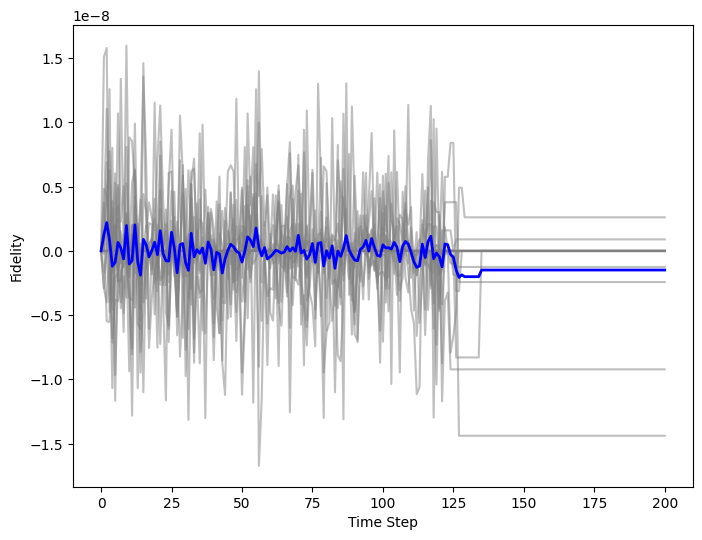

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
fidelities_mat = np.array(fidelities_each) - np.array(fidelities_each_1)
ax.plot(fidelities_mat.T, alpha=0.5, color='gray')
ax.plot(np.mean(fidelities_mat, axis=0), color='blue', linewidth=2, label='Mean Fidelity')
ax.set_xlabel("Time Step")
ax.set_ylabel("Fidelity")